# Figure 3

In [1]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gspec #import GridSpec
from matplotlib.gridspec import GridSpec

# Import functions
%matplotlib inline

# Plotting params

In [2]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 7,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 2.5

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']


# Function to load data

In [3]:
def data_dict_from_pkl(DataName):
    FolderPath = os.getcwd() 
    DataFilePath = os.path.join(FolderPath,DataName)
    
    DataFile = open(DataFilePath, 'rb')
    Data = pickle.load(DataFile, encoding = 'latin1')
    DataFile.close()

    return Data

# Load the data

In [4]:
opt_wait_time_dict = data_dict_from_pkl('Fig3d_data_wait_time.pkl')
BVL_fit_data = data_dict_from_pkl('Fig3c_BVL_fit_data.pkl')
xy_BVL_dict = data_dict_from_pkl('Fig3c_data_XY_BVL_plot.pkl')
R_dict = data_dict_from_pkl('Fig3d_NoAverage.pkl')
R_dict_Average = data_dict_from_pkl('Fig3d_Average.pkl')

# Define carbon ms0 and ms1 frequencies

In [5]:
C_freq_dict = {}
C_freq_dict['C1'] = {}
C_freq_dict['C1']['ms0'] = 431957.298
C_freq_dict['C1']['ms1'] = 469011.306

C_freq_dict['C2'] = {}
C_freq_dict['C2']['ms0'] = 431958.559
C_freq_dict['C2']['ms1'] = 413466.286

C_freq_dict['C5'] = {}
C_freq_dict['C5']['ms0'] = 431951.79
C_freq_dict['C5']['ms1'] = 408323.802

data_qbt = 'C5'
data_ms0_freq = C_freq_dict[data_qbt]['ms0']
data_ms1_freq = C_freq_dict[data_qbt]['ms1']

# Generate the plot from the data with the averaged ratio data

g = [np.float64(1.4877049180327868), None]. At = [np.float64(0.02798897711248242), np.float64(0.0006257651884487195)]. A_par = [24400.0, None]. chi_sq = 4.698902213257151 



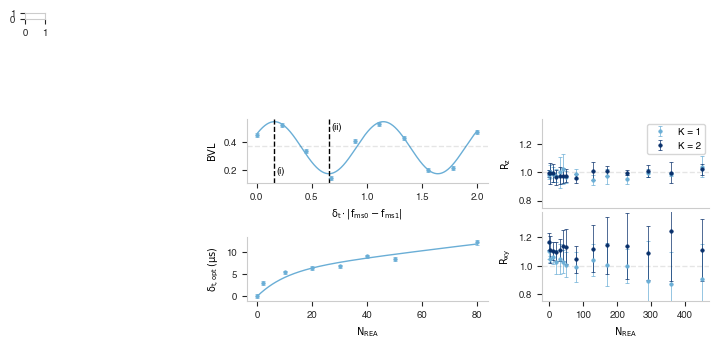

In [6]:
# Define the figure, gridspec and sub-gridspec. From these gridspecs, define the plot axes.
fig_multiplier = 1
fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54*fig_multiplier])#,constrained_layout=True)

gs = GridSpec(9, 10, figure=fig)#, hspace = 2)#, hspace = 1, wspace = 0.1)
ax00 = fig.add_subplot(gs[0,0])
# ax_2d = fig.add_subplot(gs[1,3])
c_blue = cm.Blues([np.linspace(0,1,3)])[0][1]

'''

PLOTTING OF FIGURE 3c

'''

gs0a = gspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = gs[3:,3:7], hspace = 0.85)

# Define whether or not to plot the BVL oscillations in units of relative frequency. Relative frequency is defined as "wait_time * |f_(ms0) - f_(ms1)|"
relative_freq = True

ax_dict = {}
ax_dict[0] = fig.add_subplot(gs0a[1,0])# , sharex = ax_dict[2])
ax_dict[1] = fig.add_subplot(gs0a[0,0])


# Extract the data
N_LDE_list = opt_wait_time_dict['N_LDE_list']
wait_time = opt_wait_time_dict['wait_time']
wait_time_err = opt_wait_time_dict['wait_time_err']
opt_wait_time_x_fit = opt_wait_time_dict['x_fit']
opt_wait_time_y_fit = opt_wait_time_dict['y_fit']
g_fit = opt_wait_time_dict['g']
At_fit = opt_wait_time_dict['At']
A_par_fit = opt_wait_time_dict['A_par']
chi_sq_fit = opt_wait_time_dict['reduced_chisq']

N_LDE_toplot = 30
PlotData = xy_BVL_dict[N_LDE_toplot]

wait_time_us = np.array(list(PlotData.keys()))
BVL = np.array([PlotData[key]['BVL'][0] for key in list(PlotData.keys())])
BVL_err = np.array([PlotData[key]['BVL'][1] for key in list(PlotData.keys())])
x_exp = np.array([PlotData[key]['x'][2] for key in list(PlotData.keys())])
x_exp_err = np.array([PlotData[key]['x'][3] for key in list(PlotData.keys())])
y_exp = np.array([PlotData[key]['y'][2] for key in list(PlotData.keys())])
y_exp_err = np.array([PlotData[key]['y'][3] for key in list(PlotData.keys())])


if relative_freq == True:
    wait_time_us = wait_time_us*1e-6*np.abs( C_freq_dict[data_qbt]['ms0']-C_freq_dict[data_qbt]['ms1'] )
    BVL_freq_guess = 1
    xlabel = r'$\mathrm{\delta_{t} \cdot |f_{ms0}-f_{ms1}|}$'
else:
    xlabel = r'$\mathrm{\delta_{t} (\mu s)}$'

    

MsmtName_ID = PlotData[list(PlotData.keys())[0]]['MsmtDataName']
MsmtName_ID = MsmtName_ID[0:MsmtName_ID.find('_')]


ax_dict[0].errorbar(N_LDE_list, wait_time, wait_time_err, linestyle = 'none', marker = 'o', color = c_blue, \
                    markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
ax_dict[0].set_xlabel(r'$\mathrm{N_{REA}}$')
ax_dict[0].set_ylabel(r'$\mathrm{\delta_{t,opt} \, (\mu s)}$')
ax_dict[0].spines['right'].set_visible(False)
ax_dict[0].spines['top'].set_visible(False)
ax_dict[0].plot(opt_wait_time_x_fit,opt_wait_time_y_fit, color = c_blue, linewidth = linewidth_default*fig_multiplier)

print(f'g = {g_fit}. At = {At_fit}. A_par = {A_par_fit}. chi_sq = {chi_sq_fit} \n')


ax_dict[1].errorbar(wait_time_us, BVL, BVL_err, linestyle = 'none', marker = 'o', color = c_blue, \
                    markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)

# fit_results_BVL = speclib.Paperfit_cos(MsmtName_ID, None, wait_time_us, BVL, BVL_err, 'BVL', 'k', BVL_freq_guess, PlotFit = False)
# fit_result_all_BVL = fit_results_BVL[1]
BVL_x_fit = BVL_fit_data['x'] # np.linspace(np.min(wait_time_us), np.max(wait_time_us),1000)
BVL_y_fit = BVL_fit_data['y'] # fit_result_all_BVL['fitfunc'](BVL_x_fit)
ax_dict[1].plot(BVL_x_fit, BVL_y_fit, color = c_blue, linewidth = linewidth_default*fig_multiplier)

ax_dict[1].axhline(y=np.mean(BVL), linestyle = '--', color = 'k', alpha = 0.1, linewidth = linewidth_default*fig_multiplier)
N_LDE_BVL_max = BVL_x_fit[ np.argmax(BVL_y_fit[0:int(len(BVL_y_fit)/2)]) ]
ax_dict[1].axvline(x=N_LDE_BVL_max, linestyle = '--', color = 'k', alpha = 1, linewidth = linewidth_default*fig_multiplier)
N_LDE_BVL_min = BVL_x_fit[ np.argmin(BVL_y_fit[0:int(len(BVL_y_fit)/2)]) ]
ax_dict[1].axvline(x=N_LDE_BVL_min, linestyle = '--', color = 'k', alpha = 1, linewidth = linewidth_default*fig_multiplier)

annotate_spacing = 0.01
x_i_annotate = N_LDE_BVL_max + annotate_spacing*(np.max(BVL_x_fit) - np.min(BVL_x_fit) )
y_i_annotate = BVL_y_fit[ np.argmin(BVL_y_fit[0:int(len(BVL_y_fit)/2)]) ]
ax_dict[1].annotate(f"(i)", xy=(x_i_annotate, y_i_annotate), color = 'k')
x_ii_annotate = N_LDE_BVL_min + annotate_spacing*(np.max(BVL_x_fit) - np.min(BVL_x_fit) )
y_ii_annotate = 0.9*BVL_y_fit[ np.argmax(BVL_y_fit[0:int(len(BVL_y_fit)/2)]) ]
ax_dict[1].annotate(f"(ii)", xy=(x_ii_annotate, y_ii_annotate), color = 'k')

ax_dict[1].spines['right'].set_visible(False)
ax_dict[1].spines['top'].set_visible(False)
ax_dict[1].set_ylabel(r'$\mathrm{BVL}$')
ax_dict[1].set_xlabel(xlabel)

'''

PLOTTING OF FIGURE 3d

'''

gs1 = gspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = gs[3:,7:], hspace = 0.05)

ax1_dict = {}
ax1_dict[1] = fig.add_subplot(gs1[1,0])
ax1_dict[0] = fig.add_subplot(gs1[0,0], sharex = ax1_dict[1])


N_spectators_list = np.array(list(R_dict.keys()))

color_list_fig2d = cm.Blues(np.linspace(0.5,1,len(N_spectators_list)-1)) # ['k','r','b']

find_RO_Str = '{C_{RO}}$:'

ylim_max = 1
ylim_min = 1
for N_spectator in N_spectators_list:
    if N_spectator != 0:
        addstring = str(N_spectator) + 'spec'
        N_LDE = R_dict_Average['x_'+addstring]
        R_xy = R_dict_Average['y_xy_avg_'+addstring]
        R_xy_err = R_dict_Average['yerr_xy_avg_'+addstring]
        R_z = R_dict_Average['y_z_avg_'+addstring]
        R_z_err = R_dict_Average['yerr_z_avg_'+addstring]
        
        # N_LDE = R_dict[N_spectator]['ratio']['x_xy']
        # R_xy = R_dict[N_spectator]['ratio']['y_xy']
        # R_xy_err = R_dict[N_spectator]['ratio']['yerr_xy']
        # R_z = R_dict[N_spectator]['ratio']['y_z']
        # R_z_err = R_dict[N_spectator]['ratio']['yerr_z']

        label = r'K = ' + str(N_spectator)

        color = color_list_fig2d[N_spectator-1]
        ax1_dict[1].errorbar( N_LDE, R_xy, R_xy_err, marker = 'o', linestyle = 'none', label = label, color = color, \
                       markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
        ax1_dict[0].errorbar( N_LDE, R_z, R_z_err, marker = 'o', linestyle = 'none', label = label, color = color, \
                       markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)

        ylim_max_lst = [ylim_max, np.max(R_xy), np.max(R_z)]
        ylim_max = np.max(ylim_max_lst)
        ylim_min_lst = [ylim_min, np.min(R_xy), np.min(R_z)]
        ylim_min = np.min(ylim_min_lst)

ylim_buffer = 0.2
ylim_max = 1 + (1+ylim_buffer)*(ylim_max-1)
ylim_min = 1 - (1+ylim_buffer)*(1-ylim_min)
# Hard code the ylimits
ylim_max = 1.38
ylim_min = 0.75

ax1_dict[1].axhline(y=1, linestyle = '--', color = 'k', alpha = 0.1, linewidth = linewidth_default*fig_multiplier)
ax1_dict[1].spines['right'].set_visible(False)
ax1_dict[1].spines['top'].set_visible(False)
ax1_dict[1].set_xlabel(r'$\mathrm{N_{REA}}$')
ax1_dict[1].set_ylabel(r'$\mathrm{R_{xy}}$')
ax1_dict[1].set_ylim([ylim_min, ylim_max])

ax1_dict[0].axhline(y=1, linestyle = '--', color = 'k', alpha = 0.1, linewidth = linewidth_default*fig_multiplier)
ax1_dict[0].set_ylim([ylim_min, ylim_max])
ax1_dict[0].set_ylabel(r'$\mathrm{R_{z}}$')
ax1_dict[0].legend()
ax1_dict[0].spines['right'].set_visible(False)
ax1_dict[0].spines['top'].set_visible(False)
plt.setp( ax1_dict[0].get_xticklabels(), visible=False)
ax1_dict[0].tick_params(bottom=False)

plt.tight_layout()


# FolderPath = r'...' 
# FigName = 'Fig3.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)
